In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ray
from ray.rllib.algorithms.algorithm import Algorithm

from esc.epanet_env import EPANETEnv


/opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to 

In [2]:
ray.init()

2022-12-01 13:32:26,649	INFO worker.py:1528 -- Started a local Ray instance.


Python version:,3.10.7
Ray version:,2.1.0


In [3]:
algo = Algorithm.from_checkpoint('/Users/maxdumas/ray_results/PPO_EPANETEnv_2022-12-01_12-22-53w9vg16qd/checkpoint_000101')

2022-12-01 13:32:27,439	WARNING deprecation.py:47 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-12-01 13:32:27,441	WARNING algorithm.py:2531 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Algorithm.train()`. Instead, you will have to call `Algorithm.evaluate()` manually in order to trigger an evaluation run.
2022-12-01 13:32:27,441	WARNING ppo.py:351 -- `train_batch_size` (4000) cannot be achieved with your other settings (num_workers=9 num_envs_per_worker=1 rollout_fragment_length=445)! Auto-adjusting `rollout_fragment_length` to 445.
2022-12-01 13:32:27,444	INFO algorithm.py:457 -- Current log_level is ERROR. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=44551) /opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_sh

(RolloutWorker pid=44550) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=44550) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=44550) 
(RolloutWorker pid=44551) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=44551) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=44551) 
(RolloutWorker pid=44555) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=44555) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=44555) 
(RolloutWorker pid=44554) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=44554) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=44554) 
(RolloutWorker pid=44552) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=44552) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=44552) 
(RolloutWorker pid=44547) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=44547) Input File BUILDING.inp load

(pid=44566) /opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
(pid=44566)   DESCRIPTOR = _descriptor.FileDescriptor(
(pid=44566) /opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
(pid=44566)   _descriptor.FieldDescriptor(
(pid=44566) /opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:29: DeprecationWarning: Call to deprecated create function 

In [4]:
env = EPANETEnv({})
obs = env.reset()
done = False
O = []
A = []
R = []

while not done:
    action = algo.compute_single_action(obs)
    obs, reward, done, _ = env.step(action)
    tank_head = obs[-3]
    O.append(obs)
    # E.append(obs[9] * action)
    # T.append(tank_head)
    # R.append(reward)
    A.append(action)
    R.append(reward)

O = np.array(O)
A = np.array(A)
R = np.array(R)

algo.stop()

EPANET version 20200 loaded (EPyT version 1.0.1).
Input File BUILDING.inp loaded successfully.

(RolloutWorker pid=44566) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=44566) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=44566) 
Close toolkit for the input file "BUILDING". EPANET Toolkit is unloaded.

Hydraulic Analysis completed succesfully.


In [5]:
plt.rcParams['figure.figsize'] = [8.0, 4.0]
plt.rcParams['figure.dpi'] = 140

Text(0.5, 1.0, 'Pump Energy Cost')

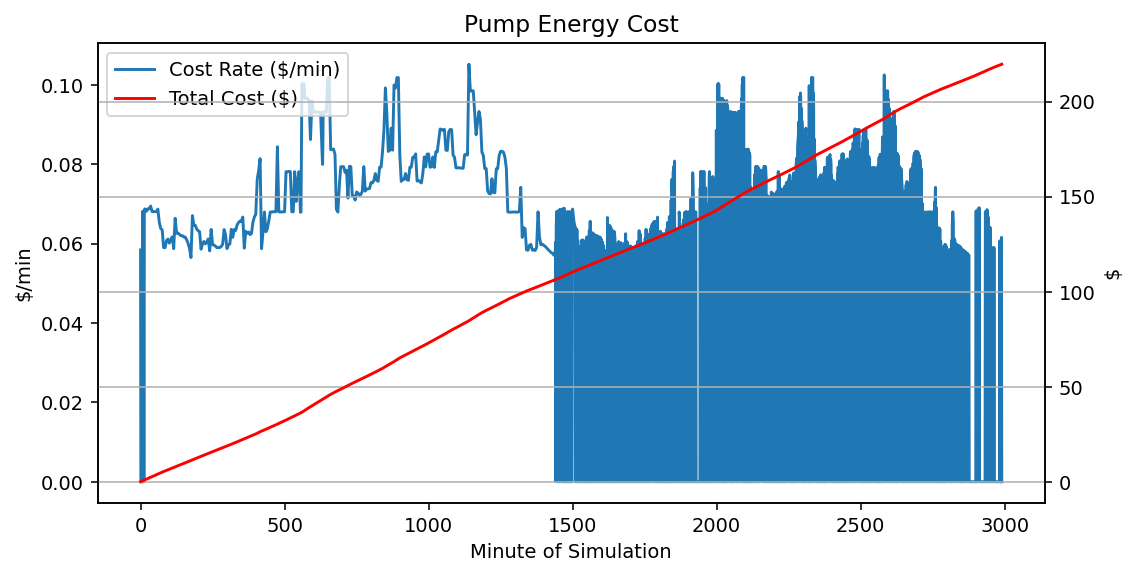

In [16]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(O[:, 9] * A, label="Cost Rate ($/min)")
ax2 = ax1.twinx()
ln2 = ax2.plot(np.cumsum(O[:, 9]), label="Total Cost ($)", color="r")
ax2.grid()
ax1.legend(ln1 + ln2, [l.get_label() for l in ln1 + ln2], loc=2)
ax1.set_xlabel("Minute of Simulation")
ax1.set_ylabel("$/min")
ax2.set_ylabel("$")
plt.title("Pump Energy Cost")

Text(0.5, 1.0, 'Tank Head (m)')

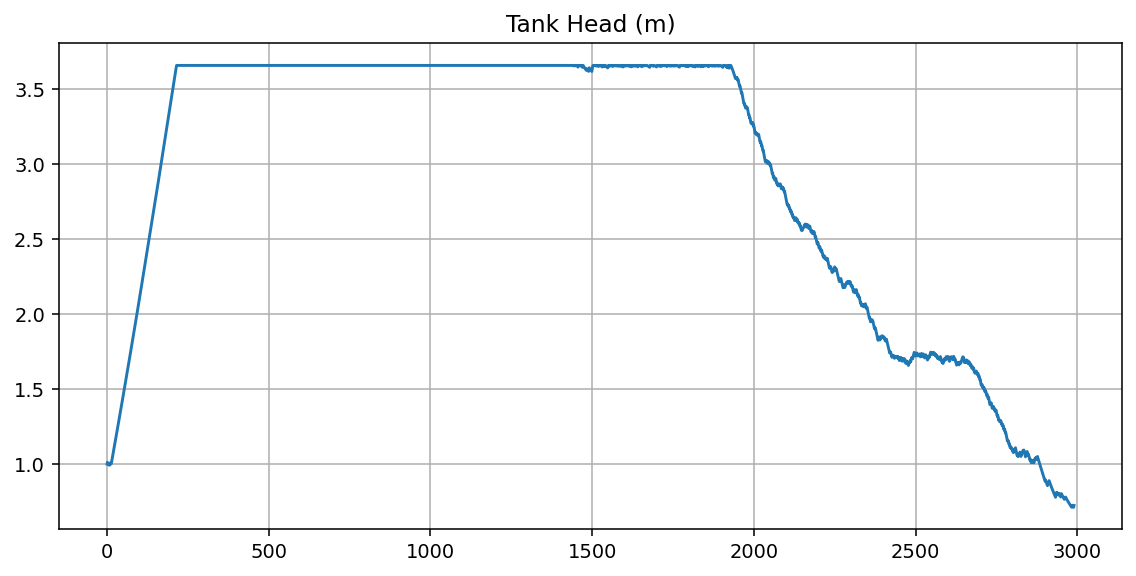

In [15]:
plt.plot(O[:, -3])
plt.grid()
plt.title("Tank Head (m)")

Text(0.5, 1.0, 'Number of Pump Actions')

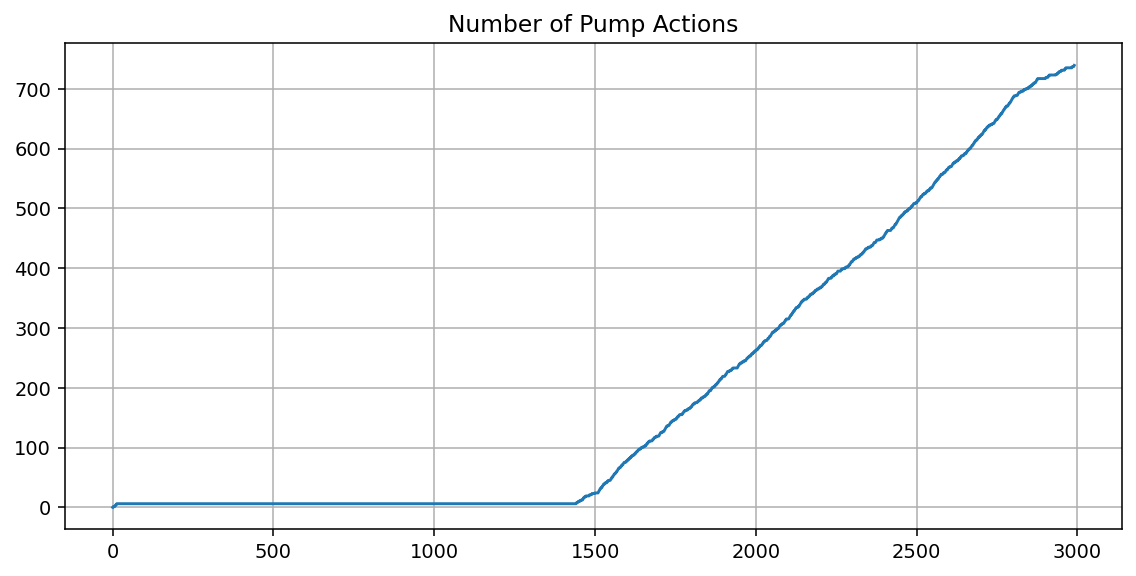

In [19]:
plt.plot(O[:, -1])
plt.grid()
plt.title("Number of Pump Actions")

Text(0.5, 1.0, 'Reward')

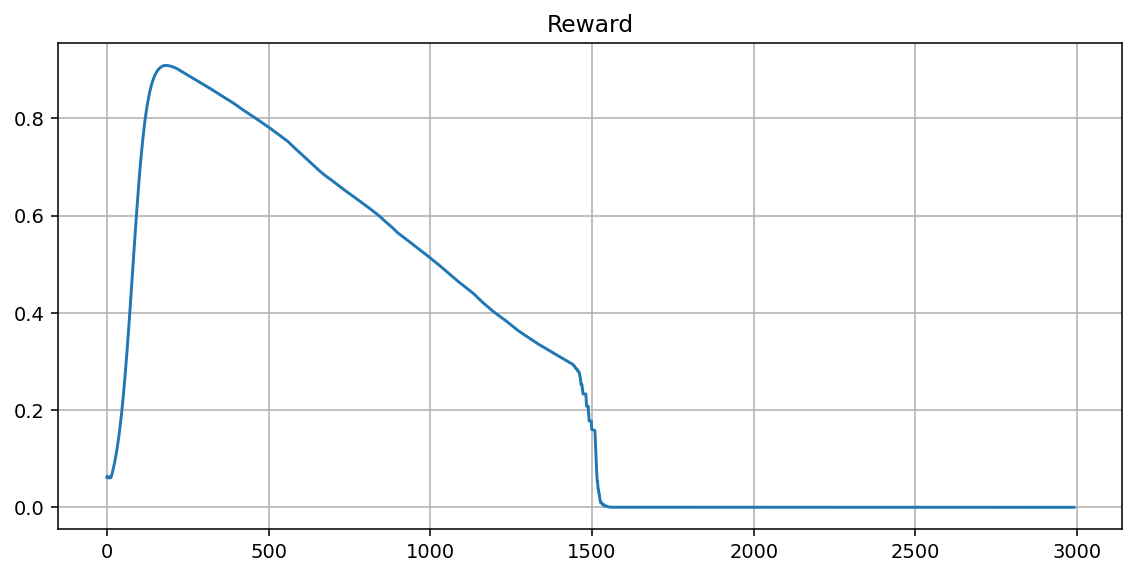

In [18]:
plt.plot(R)
plt.grid()
plt.title("Reward")